# Gridworld example with Q-learning and Sarsa

In [1]:
# importing the necessary libraries
from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np

<img src="http://drive.google.com/uc?export=view&id=18q7KL4aV6McMtaid_1Let2aGkw6d4QYn" width=45%>
<img src="RL-day3-gridworld-picture.png" width=45%>

In [2]:
class GridWorld:
    """
    The gridworls is a frequently used demo environment in reinforcement learning
    to try and test ideas.
    Today, we will use it to understand the concepts so far.
    
    The environment: (see image)
    * cells: the agent can step on a cell. There is exactly one cell to start from.
    This is the top left corner. There is one terminal cell where the walking ends, 
    the agent can not leave it (blue).
    * obstacles: there are cells where the agent can not step. (gray)
    * agent: it can move from one cell to an other neighboring cell. 
    Possible directions: up, down, left, right. Each transition happens with probability 1.
    * reward: after each transition the agent receives -1 point. In the terminal cell, no reward
    received anymore.
    
    Implement the environment below!
    """
    def __init__(self, size, start_cell, obstacles, terminating_state):
        self.size = size
        self.start = start_cell
        self.obstacles = obstacles
        self.termin = terminating_state
        self.current_cell = self.start
    
    def reset(self):
        # ----- reset the current cell to the start cell to start again -----
        self.current_cell = self.start
    
    def transition(self, cell, action):
        # ----- IMPLEMENT FUNCTION -----
        # cell = (row, column) indices
        # action: 0 left, 1 up, 2 right, 3 down
        # returns: What will be the next state
        # Take care of the borders of the grid!
        delta = [(0, -1), (-1, 0), (0, 1), (1, 0)]
        r_next = cell[0] + delta[action][0]
        c_next =  cell[1] + delta[action][1]
        # Check borders, obstacles and termination
        if 0 <= r_next < self.size[0
        ] and 0 <= c_next < self.size[1
        ] and (r_next, c_next) not in self.obstacles \
        and cell != self.termin:
            self.current_cell = (r_next, c_next)
            return (r_next, c_next)
        r, c = cell
        self.current_cell = (r, c)
        return (r, c)

    def reward(self, cell, action):
        # ----- RETURN REWARD -----
        # -1 if not in the terminal state
        if cell == self.termin:
            return 0
        else:
            return -1
    
    def in_terminal(self):
        return self.current_cell == self.termin

In [3]:
class QLearning:
    """
    In this class you can implement the Q-learning algorithm.
    The algorithm will run trajectories in the environment (grid world)
    and according to the transitions ()
    """
    def __init__(self, gridworld, gamma, alpha, episodes):
        self.gridworld = gridworld
        self.gamma = gamma
        self.alpha = alpha
        self.episodes = episodes
        # create table
        size = gridworld.size
        # ----- implement this -----
        self.q_table = np.zeros((4, size[0], size[1])) # create a numpy matrix for storing the q-values for each actions and states
        # epsilon greedy
        self.eps = 0.9
        self.episode = 0
        # preformance summary
        self.sum_rewards = []
        self.path = []
    
    def update(self, cell, action, reward, next_cell):
        # the update rule for q-learning
        r_t, c_t = cell  # current state
        r_tp1, c_tp1 = next_cell  # next state
        # ----- implement the update rule -----
        self.q_table[action, r_t, c_t] += self.alpha * (
            reward + self.gamma * self.q_table[np.argmax(self.q_table[:, r_tp1, c_tp1]), r_tp1, c_tp1] - self.q_table[action, r_t, c_t]
        )
    
    def choose_action(self, cell):
        r, c = cell
        # ----- choose the next action accroding to epsilon-greedy -----
        if np.random.rand() < self.eps:
            action = np.random.randint(0, 4)
        else:
            action = np.argmax(self.q_table[:, r, c])
        
        return action
    
    def anneal_epsilon(self):
        # 1.5 - anneal earlier then the last episode
        # ----- Question: how does this function look like? -----
        # Answere: ...
        self.eps = max(0, self.eps * (1 - self.episode / self.episodes * 1.5))
    
    def one_episode(self):  # plays an episode
        # This function is responsible for running the agent 
        # for one episode.
        # During each transition, the Q-function is updated.
        # ----- implement the missing parts -----
        cntr = 0  # counter to avoid infinite loops when the agent stucks in the grid and can not reach the terminal state
        # ----- reset the gridworld -----
        self.gridworld.reset()
        # ----- append zero at the end of sum_rewards -----
        self.sum_rewards.append(0)
        # ---- cycle until termination (end of the current episode) or an upper limit (e.g. 5000)
        while not self.gridworld.in_terminal() and cntr < 5000:
            # ----- increase the counter -----
            cntr += 1
            # ----- get the current cell -----
            cell = self.gridworld.current_cell
            # ----- choose the action -----
            action = self.choose_action(cell)
            # ----- get the reward -----
            reward = self.gridworld.reward(cell, action)
            # ----- make one transition and store -----
            next_cell = self.gridworld.transition(cell, action)
            # ----- update the q-table -----
            self.update(cell, action, reward, next_cell)
            # ----- add the reward to the last element in sum_rewards -----
            self.sum_rewards[-1] += reward
        # ----- anneal epsilon -----
        self.anneal_epsilon()
        # ----- increase the episode counter -----
        self.episode += 1
    
    def trajectory(self):
        self.gridworld.reset()
        self.path = []
        sum_rewards = 0
        itr = 0
        while not self.gridworld.in_terminal() and itr < 20:
            r, c = self.gridworld.current_cell
            action = np.argmax(self.q_table[:, r, c])
            self.gridworld.transition((r, c), action)
            sum_rewards += self.gridworld.reward((r, c), action)
            itr += 1
            self.path.append((r, c))
        return sum_rewards

    def is_learning_finished(self):  # depands on the number of episodes
        return self.episode > self.episodes

In [7]:
class Sarsa:
    
    def __init__(self, gridworld, gamma, alpha, episodes):
        self.gridworld = gridworld
        self.gamma = gamma
        self.alpha = alpha
        self.episodes = episodes
        # create table
        size = gridworld.size
        # ----- implement this -----
        self.q_table = np.zeros((4, size[0], size[1])) # create a numpy matrix for storing the q-values for each actions and states
        # epsilon greedy
        self.eps = 0.9
        self.episode = 0
        # preformance summary
        self.sum_rewards = []
        self.path = []
    
    def update(self, cell, action, reward, next_cell, next_action):
        # the update rule for sarsa learning
        r_t, c_t = cell  # current state
        r_tp1, c_tp1 = next_cell  # next state
        # ----- implement the update rule -----
        self.q_table[action, r_t, c_t] += self.alpha * (
            reward + self.gamma * self.q_table[next_action, r_tp1, c_tp1] - self.q_table[action, r_t, c_t]
        )
    
    def choose_action(self, cell):
        r, c = cell
        # ----- choose the next action accroding to epsilon-greedy -----
        if np.random.rand() < self.eps:
            action = np.random.randint(0, 4)
        else:
            action = np.argmax(self.q_table[:, r, c])
        
        return action
    
    def anneal_epsilon(self):
        # 1.5 - anneal earlier then the last episode
        self.eps = max(0, self.eps * (1 - self.episode / self.episodes * 1.5))
    
    def one_episode(self):  # plays an episode
        # ----- implement this -----
        # use the same logic like in Q-learning
        # be aware that this is an on-policy algorithm!
        # Question: Can you explain concisely what is the main difference
        # between on-policy and off-policy?
        cntr = 0
        self.gridworld.reset()
        self.sum_rewards.append(0)
        while not self.gridworld.in_terminal() and cntr < 5000:
            cntr += 1
            cell = self.gridworld.current_cell
            action = self.choose_action(cell)
            reward = self.gridworld.reward(cell, action)
            next_cell = self.gridworld.transition(cell, action)
            # Newly included (Not needed in Q-learning)
            next_action = self.choose_action(next_cell)
            self.update(cell, action, reward, next_cell, next_action)
            self.sum_rewards[-1] += reward
        self.anneal_epsilon()
        self.episode += 1

        # Difference on-policy/off-policy:

        # On-policy methods attempt to evaluate or improve the policy that is
        # used to make decisions, meaning they learn from the actions they are
        # currently choosing based on the policy they are following (e.g., SARSA).

        # Off-policy methods evaluate or improve a policy different from the one
        # used to generate the data, allowing them to explore and learn about the
        # optimal policy regardless of the agent's actions (e.g., Q-learning).
    
    def trajectory(self):
        self.gridworld.reset()
        self.path = []
        sum_rewards = 0
        itr = 0
        while not self.gridworld.in_terminal() and itr < 20:
            r, c = self.gridworld.current_cell
            action = np.argmax(self.q_table[:, r, c])
            self.gridworld.transition((r, c), action)
            sum_rewards += self.gridworld.reward((r, c), action)
            itr += 1
            self.path.append((r, c))
        return sum_rewards

    def is_learning_finished(self):
        return self.episode > self.episodes

In [4]:
def plot_learning_curve(ql):
    values = ql.sum_rewards
    x = list(range(len(values)))
    y = values
    plt.plot(x, y, 'ro')
    plt.show()

-209
-59
-236
-205
-260
-71
-38
-78
-71
-105
-112
-18
-53
-37
-31
-41
-22
-44
-86
-58
-62
-13
-55
-9
-68
-79
-16
-69
-32
-26
-63
-10
-34
-15
-38
-32
-52
-44
-63
-18
-40
-14
-29
-48
-34
-15
-71
-25
-32
-61
-13
-40
-28
-21
-46
-29
-19
-66
-43
-14
-10
-20
-20
-33
-57
-9
-14
-33
-26
-24
-15
-47
-32
-20
-14
-54
-9
-44
-27
-18
-23
-30
-13
-56
-13
-13
-16
-19
-47
-30
-26
-17
-33
-18
-15
-26
-10
-14
-18
-24
-26
-9
-44
-24
-16
-43
-8
-16
-25
-9
-12
-10
-32
-35
-19
-21
-10
-9
-20
-21
-13
-18
-10
-34
-16
-54
-17
-11
-21
-10
-8
-26
-15
-11
-25
-18
-15
-11
-27
-21
-29
-8
-8
-12
-11
-14
-10
-16
-12
-26
-27
-16
-10
-24
-10
-14
-9
-13
-12
-34
-17
-21
-11
-15
-18
-13
-9
-8
-9
-33
-8
-31
-11
-11
-23
-12
-22
-11
-10
-9
-11
-9
-9
-15
-13
-10
-12
-27
-8
-29
-9
-8
-22
-12
-10
-8
-29
-13
-11
-10
-8
-13
-9
-15
-16
-11
-9
-14
-12
-9
-15
-8
-25
-12
-17
-8
-10
-17
-12
-10
-9
-12
-8
-24
-8
-8
-19
-10
-17
-8
-8
-10
-19
-14
-8
-11
-8
-30
-9
-14
-8
-8
-10
-9
-14
-8
-13
-8
-9
-19
-8
-8
-9
-13
-10
-10
-9
-10
-10
-11
-

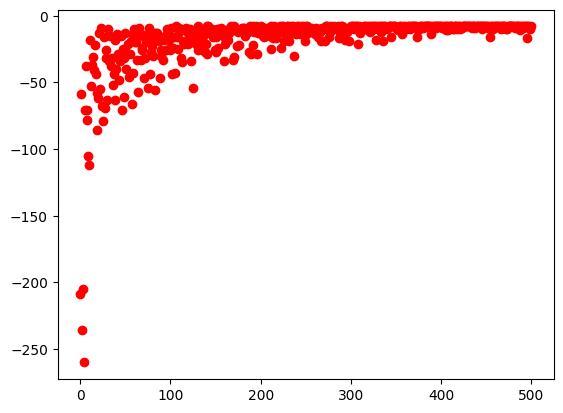

In [5]:
# grid world parameters
size = (6, 6)
start_cell = (0, 0)
obstacles = [(3, 3)]
terminating_state = (3, 5)
# q learning parameters
gamma = 0.9
alpha = 0.1
episodes = 500

gw = GridWorld(size, start_cell, obstacles, terminating_state)
solver = QLearning(gw, gamma, alpha, episodes)  # ----- try both of them -----
#solver = Sarsa(gw, gamma, alpha, episodes) (SEE BELOW)

while not solver.is_learning_finished():
    solver.one_episode()
    sum_rewards = solver.sum_rewards[-1]
    print(sum_rewards)

sum_rewards = solver.trajectory()
print(sum_rewards)
plot_learning_curve(solver)

-295
-64
-48
-252
-112
-21
-43
-46
-245
-140
-36
-82
-71
-38
-62
-31
-60
-45
-64
-16
-90
-16
-34
-59
-47
-24
-12
-49
-63
-44
-12
-26
-15
-20
-52
-57
-26
-27
-22
-11
-56
-26
-41
-15
-43
-57
-44
-14
-23
-52
-68
-26
-16
-25
-17
-22
-30
-12
-89
-19
-9
-24
-44
-47
-18
-15
-24
-15
-77
-23
-15
-15
-30
-19
-32
-39
-15
-33
-17
-19
-22
-34
-14
-14
-30
-22
-25
-10
-36
-20
-18
-17
-18
-36
-34
-13
-35
-12
-43
-11
-19
-21
-23
-12
-8
-21
-15
-28
-17
-30
-18
-13
-14
-25
-33
-32
-16
-15
-10
-10
-20
-33
-39
-15
-11
-20
-12
-26
-8
-19
-10
-21
-15
-20
-8
-25
-8
-17
-31
-39
-12
-14
-10
-16
-10
-21
-8
-20
-8
-11
-36
-11
-10
-14
-12
-8
-29
-13
-34
-9
-8
-17
-26
-9
-10
-20
-14
-9
-10
-20
-27
-14
-10
-15
-9
-18
-29
-10
-8
-10
-16
-11
-10
-8
-13
-31
-14
-13
-12
-12
-21
-9
-12
-9
-9
-10
-23
-13
-10
-27
-13
-8
-8
-13
-12
-10
-28
-21
-13
-10
-8
-10
-12
-10
-10
-11
-11
-13
-9
-8
-11
-13
-8
-8
-42
-11
-11
-8
-10
-9
-14
-9
-13
-8
-10
-12
-13
-13
-10
-9
-9
-10
-22
-8
-8
-9
-12
-8
-10
-16
-9
-25
-8
-8
-11
-8
-15
-9
-9


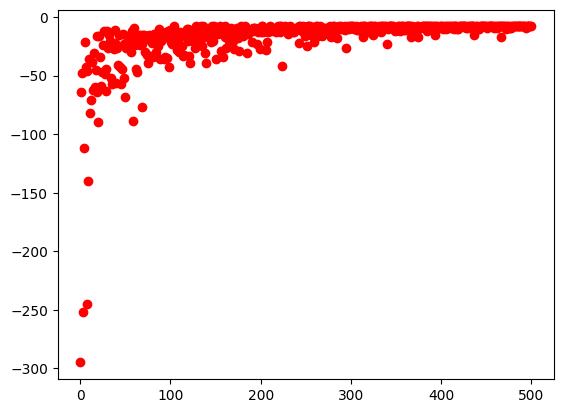

In [8]:
solver = Sarsa(gw, gamma, alpha, episodes)

while not solver.is_learning_finished():
    solver.one_episode()
    sum_rewards = solver.sum_rewards[-1]
    print(sum_rewards)

sum_rewards = solver.trajectory()
print(sum_rewards)
plot_learning_curve(solver)